<a href="https://colab.research.google.com/github/vivekkchandra/CE888/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
cust_df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
cust_data = cust_df.values.T[1]
print(cust_data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
cust_data.shape

In [0]:
#Bootstrap function:
# 1. Create an array of samples of shape
#    the number of rows is same as ith value transferred from from the for loop
# 2. Calculate and save the mean of the array
# 3. In each iteration:
# i. Get the data corresponding to that iteration (new_samples[iteration, :])
# ii. Calculate the mean of the iteration data and store it
# 4. Calculate the lower and upper bounds for a 95% CI
# 5. Return mean_data, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  bostraplist=np.random.choice(sample,(n_iterations,sample_size),replace=True)
  mean_data=np.mean(bostraplist)
  mean_list=[]
  for i in range(len(bostraplist)):
    new_samp=bostraplist[i,:]
    mean_sample=np.mean(new_samp)
    mean_list.append(mean_sample)
   
  lower=np.percentile(mean_list, 2.5)
  upper=np.percentile(mean_list, 97.5)
  return mean_data,lower,upper

(0.0, 100000.0)

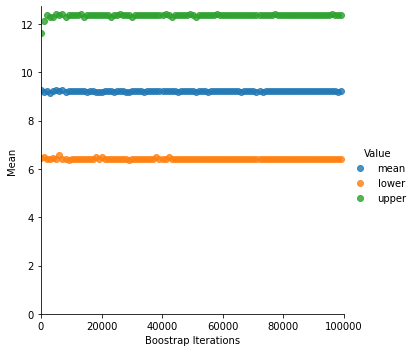

In [0]:
custboot1 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(cust_data, cust_data.shape[0], i)
    custboot1.append([i, boot[0], "mean"])
    custboot1.append([i, boot[1], "lower"])
    custboot1.append([i, boot[2], "upper"])

boot_df = pd.DataFrame(custboot1, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(boot_df.columns[0], boot_df.columns[1], data=boot_df, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    bostraplist=np.random.choice(sample,(iterations,sample_size),replace=True)
    mean_data=np.mean(bostraplist)
    mean_list=[]
    for i in range(len(bostraplist)):
        new_sample=bostraplist[i,:]
        mean_sample=np.mean(new_sample)
        mean_list.append(mean_sample)
    lower=np.percentile(mean_list, (100-ci)/2)
    upper=np.percentile(mean_list, ci+(100-ci)/2)
    return mean_data, lower, upper

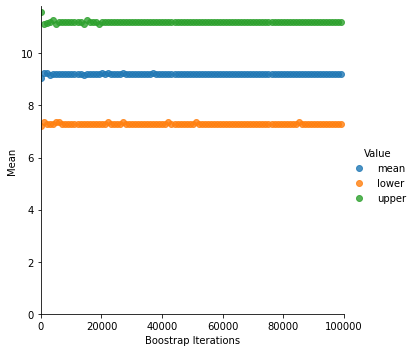

In [0]:
# CI: 80%
custboot2 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(cust_data, cust_data.shape[0], i, 80)
    custboot2.append([i, boot[0], "mean"])
    custboot2.append([i, boot[1], "lower"])
    custboot2.append([i, boot[2], "upper"])

boot_df = pd.DataFrame(custboot2, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(boot_df.columns[0], boot_df.columns[1], data=boot_df, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

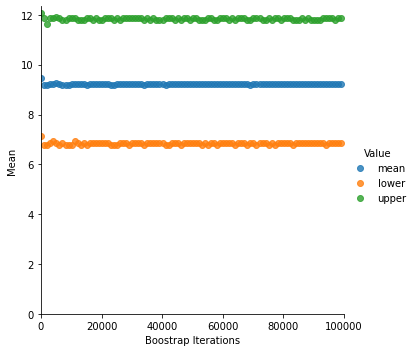

In [0]:
#CI: 90% 
custboot3 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(cust_data, cust_data.shape[0], i, 90)
    custboot3.append([i, boot[0], "mean"])
    custboot3.append([i, boot[1], "lower"])
    custboot3.append([i, boot[2], "upper"])

boot_df = pd.DataFrame(custboot3, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(boot_df.columns[0], boot_df.columns[1], data=boot_df, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_90.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_90.pdf", bbox_inches='tight')

In [0]:
vehicles_df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [0]:
print(vehicles_df)

     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]


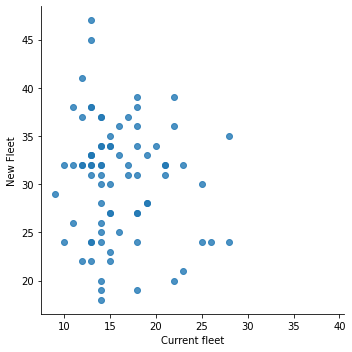

In [0]:
#Current and the proposed fleet scatterplots
sns.lmplot(vehicles_df.columns[0], vehicles_df.columns[1],data=vehicles_df, fit_reg=False)

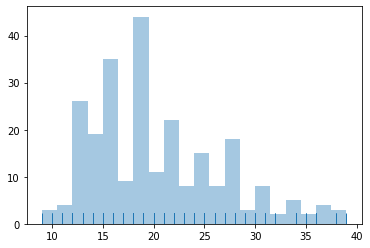

In [0]:
#Current fleet and the proposed fleet histograms
datacol0=vehicles_df[vehicles_df.columns[0]].values
sns.distplot(datacol0, bins=20, kde=False, rug=True)

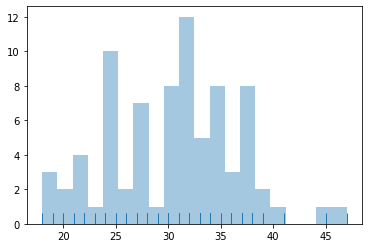

In [0]:
#new fleet
datacol1=vehicles_df[vehicles_df.columns[1]].values
sns.distplot(datacol1, bins=20, kde=False, rug=True)

In [0]:
#Calculate the mean of both samples
vehicles_df_nonan=vehicles_df[~np.isnan(vehicles_df)]
print(np.mean(vehicles_df_nonan))

Current fleet    20.144578
New Fleet        30.481013
dtype: float64


In [0]:
#Bootstrap old fleet: 100 iteration
boots_veh_old = []
boot = boostrap_mean_ci(datacol0, datacol0.shape[0],100,80)
boots_veh_old.append([boot[0], "mean"])
boots_veh_old.append([boot[1], "lower"])
boots_veh_old.append([boot[2], "upper"])

df_boot = pd.DataFrame(boots_veh_old, columns=['Mean', "Value"])
print(df_boot)


        Mean  Value
0  20.165422   mean
1  19.730120  lower
2  20.615663  upper


In [0]:
#Remove NAN values from new Fleet
datacol1_nonan = datacol1[np.logical_not(np.isnan(datacol1))]
boots_veh_new = []
boot = boostrap_mean_ci(datacol1_nonan, datacol1_nonan.shape[0], 100, 80)
boots_veh_new.append([boot[0], "mean"])
boots_veh_new.append([boot[1], "lower"])
boots_veh_new.append([boot[2], "upper"])

df_boot = pd.DataFrame(boots_veh_new, columns=['Mean', "Value"])
print(df_boot)

        Mean  Value
0  30.480633   mean
1  29.822785  lower
2  31.368354  upper


In [0]:
t_obs=boots_veh_new[0][0]-boots_veh_old[0][0]
t_obs

10.315211224645417

In [0]:
#Permutation:
l_datacol0=len(datacol0)
l_datacol1_nonan=len(datacol1_nonan)
concat = np.concatenate((datacol0,datacol1_nonan))
count=0
for i in range(20000):
    perm = np.random.permutation(concat)
    pold=perm[:int(l_datacol0)]
    pnew=perm[int(l_datacol0):]
    poldmean=np.mean(pold)
    pnewmean=np.mean(pnew)
    t_perm=pnewmean-poldmean
    print("t_perm : ",t_perm, " t_obs : ", t_obs)
    if(t_perm>t_obs):
      count=count+1
    print("--"*20)
p_value=count/20000
print(p_value)
    

Streaming output truncated to the last 5000 lines.
t_perm :  -1.385593004931117  t_obs :  10.315211224645417
----------------------------------------
t_perm :  -0.6019012759900342  t_obs :  10.315211224645417
----------------------------------------
t_perm :  0.9154593055767393  t_obs :  10.315211224645417
----------------------------------------
t_perm :  -1.085455747038786  t_obs :  10.315211224645417
----------------------------------------
t_perm :  1.8658939555691134  t_obs :  10.315211224645417
----------------------------------------
t_perm :  -0.45183264704387227  t_obs :  10.315211224645417
----------------------------------------
t_perm :  0.3485333740023364  t_obs :  10.315211224645417
----------------------------------------
t_perm :  1.2155965634690666  t_obs :  10.315211224645417
----------------------------------------
t_perm :  0.5819734634741494  t_obs :  10.315211224645417
----------------------------------------
t_perm :  0.8154135529459623  t_obs :  10.3152112246454

###The significance level convention is 0.05, and as p-value is less than that we can reject the Null Hypothesis stating that there were no differences in the old and new fleet and accept the Alternate Hypothesis stating the New Fleet is better than the old Fleet.